📂 Loading npz1 (early): data/data_fbodesolver_solution1_iter860.npz
📂 Loading npz2 (late):  data/data_fbodesolver_solution2_iter340.npz
Reshaped P_path: (200, 801, 3)
Loaded n_displaystep = 5 from config.


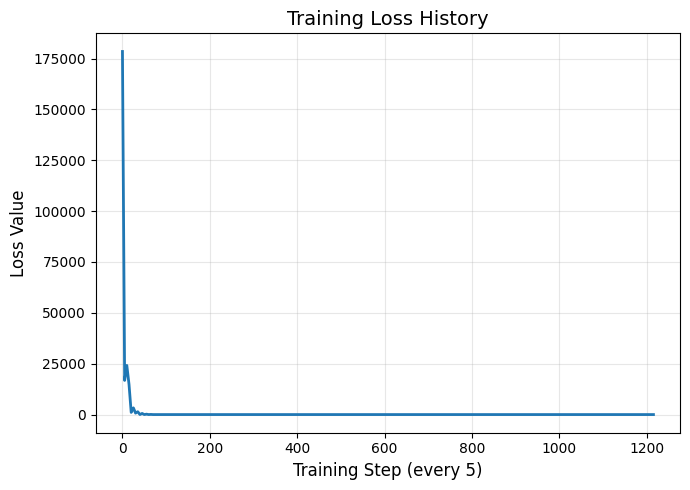

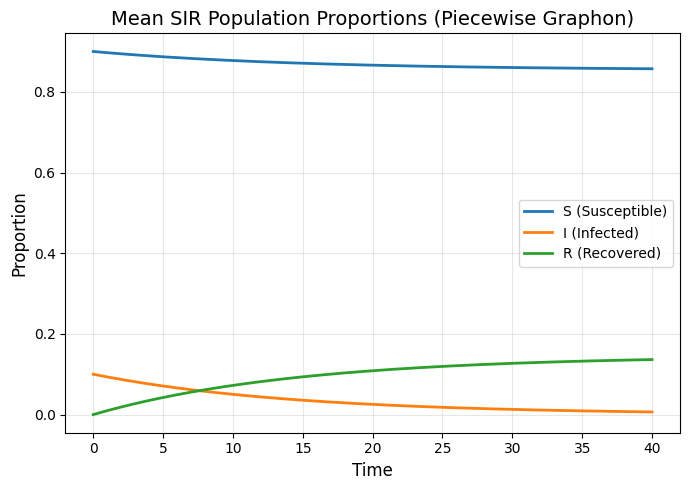

At T = 40.0
S = 85.71725202187665 %
I = 0.6504471492350518 %
R = 13.632298593714115 %

Combined loss_history:
[1.78450157e+05 1.67770795e+04 2.41562897e+04 1.48733724e+04
 1.06965399e+03 3.30896265e+03 7.05654912e+02 1.40528514e+03
 1.59368127e+01 5.53161480e+02 1.54060368e+00 2.00559196e+02
 4.03177306e+00 7.28910175e+01 1.84893179e+00 2.77664203e+01
 1.56151739e+00 1.07643777e+01 2.07605083e+00 4.23374191e+00
 2.33015555e+00 1.99986170e+00 2.13258296e+00 1.54330971e+00
 1.77136882e+00 1.54777121e+00 1.57182350e+00 1.56422590e+00
 1.51678971e+00 1.53307438e+00 1.51854109e+00 1.51194845e+00
 1.51543113e+00 1.50894488e+00 1.50464435e+00 1.50926270e+00
 1.50111675e+00 1.49843245e+00 1.49759904e+00 1.49347264e+00
 1.49718351e+00 1.49093071e+00 1.49288265e+00 1.48877209e+00
 1.48413021e+00 1.47893437e+00 1.47585126e+00 1.48000337e+00
 1.48044416e+00 1.47397464e+00 1.46962208e+00 1.46352403e+00
 1.46784508e+00 1.46799167e+00 1.46414338e+00 1.45986127e+00
 1.45795163e+00 1.46078592e+00 1.452

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import yaml


def visualize_loss_and_population(
        npz_path="data/data_fbodesolver_solution1_iter860.npz",
        npz_path2="data/data_fbodesolver_solution2_iter340.npz",
        #npz_path3="data/data_fbodesolver_solution3_iter1100.npz"
        cfg_path="config.yaml",
        save_dir="results"
    ):
    """Plot training loss history AND SIR population density over time."""

    # === Create save directory ===
    os.makedirs(save_dir, exist_ok=True)

    # === Load NPZ results ===
    print(f"📂 Loading npz1 (early): {npz_path}")
    print(f"📂 Loading npz2 (late):  {npz_path2}")

    data1 = np.load(npz_path,   allow_pickle=True)
    data2 = np.load(npz_path2,  allow_pickle=True)
    #data3 = np.load(npz_path3,  allow_pickle=True)

    # === Combined loss history (iter10 + iter940) ===
    loss_history = np.concatenate([
        np.array(data1["loss_history"], dtype=float),
        np.array(data2["loss_history"], dtype=float),
        #np.array(data3["loss_history"], dtype=float)
    ])

    # === Population paths (use latest run only) ===
    P_path = np.array(data2["P_path"])
    t_path = np.array(data2["t_path"]).flatten()

    n_samples = P_path.shape[0]
    flat_size = P_path.shape[1]
    n_time = flat_size // 3

    # reshape into (n_samples, n_time, 3)
    P_path = P_path.reshape(n_samples, n_time, 3)

    print("Reshaped P_path:", P_path.shape)

    # === Load config (optional) ===
    if os.path.exists(cfg_path):
        with open(cfg_path, "r") as f:
            cfg = yaml.safe_load(f)
        n_displaystep = cfg["solver"].get("n_displaystep", 5)
        print(f"Loaded n_displaystep = {n_displaystep} from config.")
    else:
        n_displaystep = 5
        print("⚠ Using default n_displaystep = 5")

    # === X-axis for loss ===
    steps = np.arange(len(loss_history)) * n_displaystep

    # === Compute mean S, I, R over agents ===
    mean_S = P_path[:, :, 0].mean(axis=0)
    mean_I = P_path[:, :, 1].mean(axis=0)
    mean_R = P_path[:, :, 2].mean(axis=0)

    # === LOSS FIGURE ===
    plt.figure(figsize=(7,5))
    plt.plot(steps, loss_history, linewidth=2)
    plt.title("Training Loss History", fontsize=14)
    plt.xlabel(f"Training Step (every {n_displaystep})", fontsize=12)
    plt.ylabel("Loss Value", fontsize=12)
    plt.grid(alpha=0.3)
    
    loss_path = os.path.join(save_dir, "loss_plot.png")
    plt.tight_layout()
    plt.savefig(loss_path, dpi=300)
    plt.show()

    # === POPULATION FIGURE ===
    plt.figure(figsize=(7,5))
    plt.plot(t_path, mean_S, label="S (Susceptible)", linewidth=2)
    plt.plot(t_path, mean_I, label="I (Infected)",   linewidth=2)
    plt.plot(t_path, mean_R, label="R (Recovered)",  linewidth=2)

    plt.title("Mean SIR Population Proportions (Min-Max)", fontsize=14)
    plt.xlabel("Time", fontsize=12)
    plt.ylabel("Proportion", fontsize=12)
    plt.grid(alpha=0.3)
    plt.legend()

    pop_path = os.path.join(save_dir, "population_plot.png")
    plt.tight_layout()
    plt.savefig(pop_path, dpi=300)
    plt.show()

    # === Final statistics ===
    print("At T =", t_path[-1])
    print("S =", mean_S[-1] * 100, "%")
    print("I =", mean_I[-1] * 100, "%")
    print("R =", mean_R[-1] * 100, "%")

    print("\nCombined loss_history:")
    print(loss_history)


if __name__ == "__main__":
    visualize_loss_and_population()


In [3]:
npz_path="data/data_fbodesolver_solution1_iter860.npz"
npz_path2="data/data_fbodesolver_solution2_iter340.npz"

data1 = np.load(npz_path,   allow_pickle=True)
data2 = np.load(npz_path2,  allow_pickle=True)

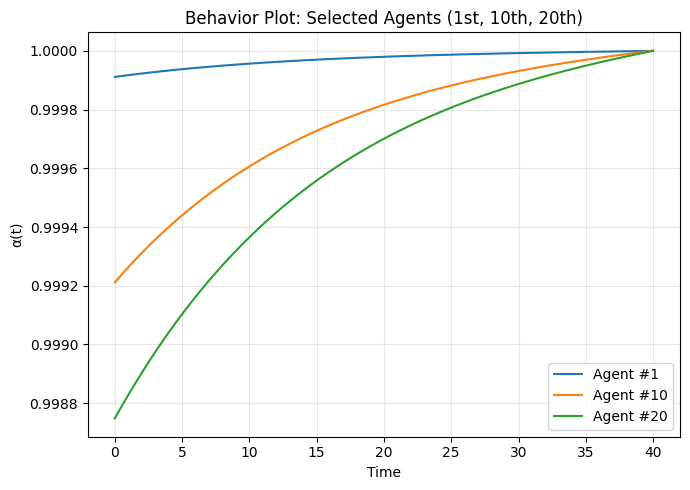

Saved: results/behavior_plot_selected.png


In [9]:
def plot_behavior(alpha_path, X_path, t_path, save_path="results"):
    """Plot α_x(t, S) behavior curves for selected agents (1,10,20)."""
    os.makedirs(save_path, exist_ok=True)

    agent_x = X_path[:, -1]
    sort_idx = np.argsort(agent_x)

    alpha_sorted = alpha_path[sort_idx]
    x_sorted = agent_x[sort_idx]

    mask = (x_sorted > 0.01) & (x_sorted < 0.99)
    alpha_filtered = alpha_sorted[mask]

    plt.figure(figsize=(7,5))

    # Choose specific agents
    indices = [0, 9, 19]   # 1, 10, 20   (0-based indexing)

    for i in indices:
        if i < len(alpha_filtered):
            plt.plot(t_path, alpha_filtered[i], label=f"Agent #{i+1}")

    plt.title("Control: Selected Agents (1st, 10th, 20th)")
    plt.xlabel("Time")
    plt.ylabel("α(t)")
    plt.legend()
    plt.grid(alpha=0.3)

    out = os.path.join(save_path, "behavior_plot_selected.png")
    plt.tight_layout()
    plt.savefig(out, dpi=300)
    plt.show()
    print(f"Saved: {out}")

plot_behavior(
    alpha_path=data2["ALPHA_path"],
    X_path=data2["X_path"],
    t_path=data2["t_path"][0],
    save_path="results"
)


Agents in plot: 196


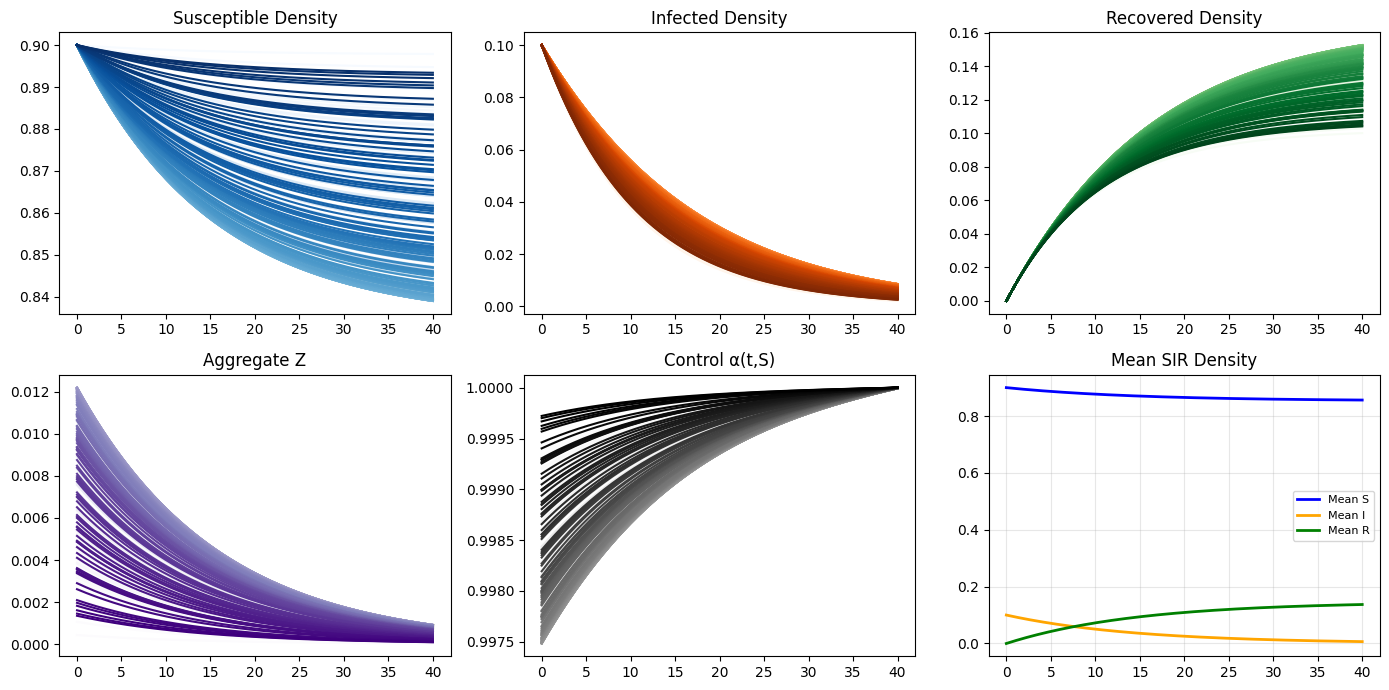

Saved: sir_convergence.png


In [18]:
from matplotlib import cm
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
import os

from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_convergence_sir(
        P_path, Z_path, A_path, X_path, t_path,
        save_path="sir_convergence.png",
        max_agents=None):

    # Extract agent x and sort
    agent_x = X_path[:, -1]
    sort_idx = np.argsort(agent_x)

    P_sorted = P_path[sort_idx]
    Z_sorted = Z_path[sort_idx]
    A_sorted = A_path[sort_idx]
    x_sorted = agent_x[sort_idx]

    # Remove boundaries
    mask = (x_sorted > 0.01) & (x_sorted < 0.99)
    P_sorted = P_sorted[mask]
    Z_sorted = Z_sorted[mask]
    A_sorted = A_sorted[mask]
    x_sorted = x_sorted[mask]

    # Limit number of agents if needed
    if max_agents is not None:
        P_sorted = P_sorted[:max_agents]
        Z_sorted = Z_sorted[:max_agents]
        A_sorted = A_sorted[:max_agents]

    # Number of valid agents
    i = len(P_sorted)
    print("Agents in plot:", i)

    # === Colormaps (exact lab style) ===
    color_S = iter(cm.Blues(np.linspace(0.0, 1, i)))
    color_I = iter(cm.Oranges(np.linspace(0.0, 1, i)))
    color_R = iter(cm.Greens(np.linspace(0.0, 1, i)))

    color_Z = iter(cm.Purples(np.linspace(0.0, 1, i)))
    color_A = iter(cm.Greys(np.linspace(0.0, 1, i)))

    fig, ax = plt.subplots(2, 3, figsize=(14, 7))

    # === S ===
    for Pi in P_sorted:
        S = Pi[0::3]
        ax[0,0].plot(t_path, S, c=next(color_S))
    ax[0,0].set_title("Susceptible Density")

    # === I ===
    for Pi in P_sorted:
        I = Pi[1::3]
        ax[0,1].plot(t_path, I, c=next(color_I))
    ax[0,1].set_title("Infected Density")

    # === R ===
    for Pi in P_sorted:
        R = Pi[2::3]
        ax[0,2].plot(t_path, R, c=next(color_R))
    ax[0,2].set_title("Recovered Density")

    # === Z === (bottom-left)
    for Zi in Z_sorted:
        ax[1,0].plot(t_path, Zi, c=next(color_Z))
    ax[1,0].set_title("Aggregate Z")

    # === α(S) === (bottom-middle)
    for Ai in A_sorted:
        ax[1,1].plot(t_path, Ai, c=next(color_A))
    ax[1,1].set_title("Control α(t,S)")

    # === MEAN SIR CURVES === (bottom-right)
    S_all = P_sorted[:, 0::3]
    I_all = P_sorted[:, 1::3]
    R_all = P_sorted[:, 2::3]

    mean_S = np.mean(S_all, axis=0)
    mean_I = np.mean(I_all, axis=0)
    mean_R = np.mean(R_all, axis=0)

    ax[1,2].plot(t_path, mean_S, label="Mean S", c="blue", lw=2)
    ax[1,2].plot(t_path, mean_I, label="Mean I", c="orange", lw=2)
    ax[1,2].plot(t_path, mean_R, label="Mean R", c="green", lw=2)

    ax[1,2].set_title("Mean SIR Density")
    ax[1,2].legend(fontsize=8)
    ax[1,2].grid(alpha=0.3)

    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()
    print(f"Saved: {save_path}")


plot_convergence_sir(
    P_path=data2["P_path"],
    Z_path=data2["Z_path"],
    A_path=data2["ALPHA_path"],
    X_path=data2["X_path"],
    t_path=data2["t_path"][0],   # no trim
    save_path="sir_convergence.png"
)